In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Task - 1:
Repeat all the task from worksheet - 5 but, try to improve the model from last week with same dataset.

• Use Data Augmentation to increase the number of training image.

• Use deeper model with BN and DropOut layer as presented above.

• Understand the Model Summary and Training Behavior.

In [2]:
#train image data
train_df = "/content/drive/MyDrive/Colab Notebooks/Artificial Intelligence and Machine Learning/week 5/FruitinAmazon/train"

#test image data
test_df = "/content/drive/MyDrive/Colab Notebooks/Artificial Intelligence and Machine Learning/week 5/FruitinAmazon/test"

In [3]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing import image_dataset_from_directory
from PIL import Image

In [4]:
def visualize_images(dataset_path):
    class_dirs = [d for d in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, d))]

    fig, axes = plt.subplots(2, len(class_dirs)//2, figsize=(12, 6))
    axes = axes.flatten()

    for i, class_name in enumerate(class_dirs):
        class_path = os.path.join(dataset_path, class_name)
        img_name = random.choice(os.listdir(class_path))
        img_path = os.path.join(class_path, img_name)
        img = load_img(img_path, target_size=(128, 128))
        axes[i].imshow(img)
        axes[i].set_title(class_name)
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()

# visualize_images(train_df)

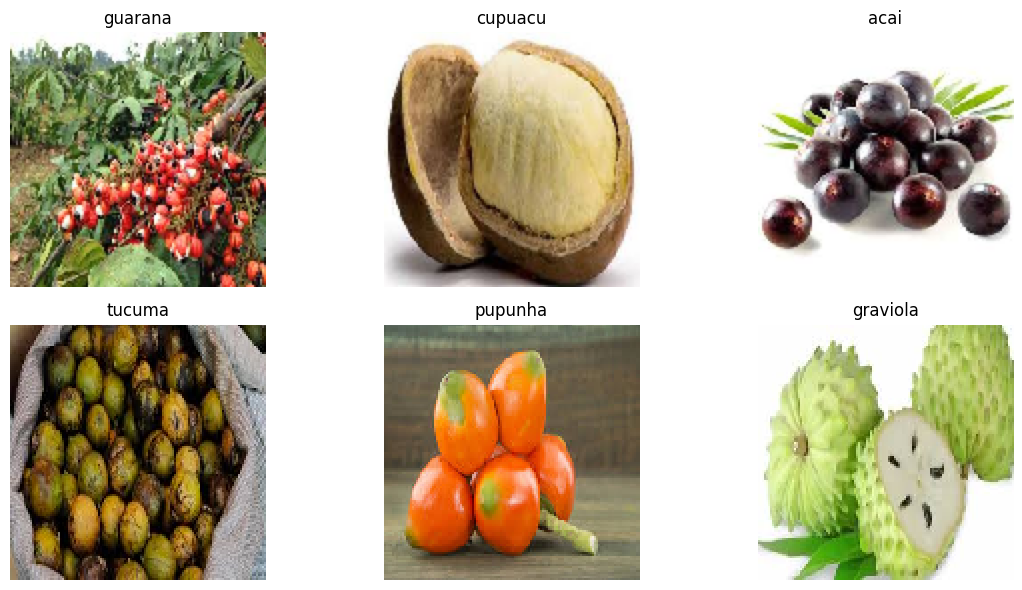

In [5]:
visualize_images(train_df)

Check for Corrupted Image:

In [6]:
from PIL import Image
def check_corrupted_images(dataset_path):
    corrupted_images = []
    for class_name in os.listdir(dataset_path):
        class_path = os.path.join(dataset_path, class_name)
        if not os.path.isdir(class_path):
            continue

        for img_name in os.listdir(class_path):
            img_path = os.path.join(class_path, img_name)
            try:
                with Image.open(img_path) as img:
                    img.verify()
            except (IOError, SyntaxError):
                os.remove(img_path)
                corrupted_images.append(img_path)

    if corrupted_images:
        for img in corrupted_images:
            print(f"Removed corrupted image: {img}")
    else:
        print("No Corrupted Images Found.")

check_corrupted_images(train_df)

No Corrupted Images Found.


Loading and Preprocessing Image Data in keras:

In [7]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory

def load_datasets(dataset_path, img_size=(128, 128), batch_size=32):
    train_ds = image_dataset_from_directory(
        dataset_path,
        validation_split=0.2,
        subset="training",
        seed=42,
        image_size=img_size,
        batch_size=batch_size
    )
    val_ds = image_dataset_from_directory(
        dataset_path,
        validation_split=0.2,
        subset="validation",
        seed=42,
        image_size=img_size,
        batch_size=batch_size
    )
    return train_ds, val_ds

train_ds, val_ds = load_datasets(train_df)

Found 90 files belonging to 6 classes.
Using 72 files for training.
Found 90 files belonging to 6 classes.
Using 18 files for validation.


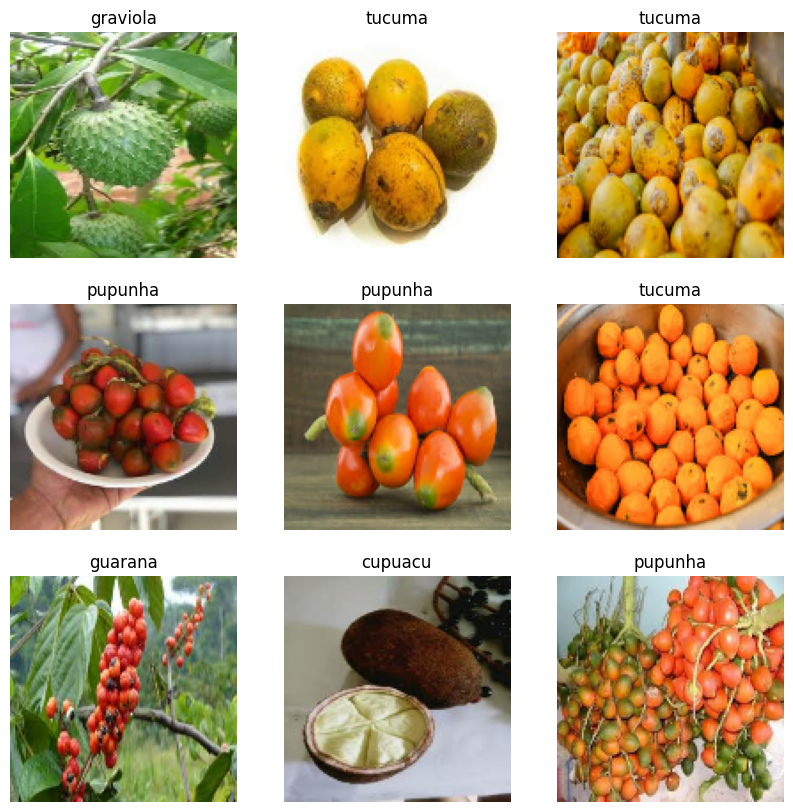

In [8]:
# Display the first batch from training dataset
for images, labels in train_ds.take(1):
    plt.figure(figsize=(10, 10))
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(train_ds.class_names[labels[i]])
        plt.axis("off")
    plt.show()

# Implement a CNN with

Follow the following Structure and Hyper - parameters:
# Convolutional Architecture:

# • Convolutional Layer 1:

– Filter Size (F): (3, 3)

– Number of Filters (k): 32

– Padding (P): same

– Stride (s): 1

# • Activation Layer:

ReLU activation

# • Pooling Layer 1: Max pooling

– Filter Size (F): (2, 2)

– Stride (s): 2

# • Convolutional Layer 2:

– Filter Size (F): (3, 3)

– Number of Filters (k): 32

– Padding (P): same

– Stride (s): 1

# • Activation Layer:
ReLU activation

# • Pooling Layer 2:
Max pooling

– Filter Size (F): (2, 2)

– Stride (s): 2


# Fully Connected Network Architecture:

• Flatten Layer: Flatten the input coming from the convolutional layers

• Input Layer:

• Hidden Layer - 2:

– Number of Neurons: 64

– Number of Neurons: 128

• Output Layer:

– Number of Neurons: num classes (number of output classes)

In [9]:
from tensorflow.keras import layers, models

def build_cnn_model(input_shape, num_classes):
    cnn_model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(128, activation='relu'),
        layers.Dense(num_classes, activation='softmax')
    ])
    return cnn_model

# Example usage:
input_shape = (128, 128, 3)
class_names = train_ds.class_names
cnn_model = build_cnn_model(input_shape, len(class_names))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Compiling Model

In [10]:
def compile_model(model):
    cnn_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return cnn_model

# Example usage:
cnn_model = compile_model(cnn_model)
cnn_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 64, 64, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │       2,097,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,116,454 (8.07 MB)

 Trainable params: 2,116,454 (8.07 MB)

 Non-trainable params: 0 (0.00 B)

# Train the Model
**Model Training**

• Use the model.fit() function to train the model. Set the batch size to 16 and the number of epochs to 250.

• Use val ds for validation.

• Use callbacks such as ModelCheckpoint and EarlyStopping for saving the best model and avoiding overfitting.

In [11]:
def train_model(model, train_ds, val_ds, epochs=250, batch_size=16):
    callbacks = [
        keras.callbacks.ModelCheckpoint("best_model.h5", save_best_only=True),
        keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
    ]
    cnn_model.fit(train_ds, validation_data=val_ds, epochs=epochs, batch_size=batch_size, callbacks=callbacks)
    return cnn_model

# Example usage:
cnn_model = train_model(cnn_model, train_ds, val_ds)

Epoch 1/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 369ms/step - accuracy: 0.1094 - loss: 151.5697

3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 657ms/step - accuracy: 0.1133 - loss: 164.6876 - val_accuracy: 0.2222 - val_loss: 174.0517
Epoch 2/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 643ms/step - accuracy: 0.2616 - loss: 163.9296

3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 878ms/step - accuracy: 0.2517 - loss: 160.1951 - val_accuracy: 0.1111 - val_loss: 97.7221
Epoch 3/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 353ms/step - accuracy: 0.2043 - loss: 74.5169

3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 557ms/step - accuracy: 0.2088 - loss: 73.2272 - val_accuracy: 0.3333 - val_loss: 21.2036
Epoch 4/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 348ms/step - accuracy: 0.4410 - loss: 12.6086

3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 476ms/step - accuracy: 0.4349 - loss: 12.5631 - val_accuracy: 0.3333 - val_loss: 6.2034
Epoch 5/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 348ms/step - accuracy: 0.4907 - loss: 3.3543

3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 474ms/step - accuracy: 0.4861 - loss: 3.4074 - val_accuracy: 0.2222 - val_loss: 5.0803
Epoch 6/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 347ms/step - accuracy: 0.5642 - loss: 2.1836

3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 520ms/step - accuracy: 0.5690 - loss: 2.0925 - val_accuracy: 0.2778 - val_loss: 2.5182
Epoch 7/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 607ms/step - accuracy: 0.8403 - loss: 0.5520

3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 790ms/step - accuracy: 0.8385 - loss: 0.5589 - val_accuracy: 0.4444 - val_loss: 1.6031
Epoch 8/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 448ms/step - accuracy: 0.8741 - loss: 0.4407 - val_accuracy: 0.3889 - val_loss: 1.6766
Epoch 9/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 427ms/step - accuracy: 0.9449 - loss: 0.3748 - val_accuracy: 0.4444 - val_loss: 1.6667
Epoch 10/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 419ms/step - accuracy: 0.9518 - loss: 0.2608 - val_accuracy: 0.4444 - val_loss: 1.8179
Epoch 11/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 506ms/step - accuracy: 0.9714 - loss: 0.1620 - val_accuracy: 0.5000 - val_loss: 2.2087
Epoch 12/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 423ms/step - accuracy: 0.9891 - loss: 0.0994 - val_accuracy: 0.5000 - val_loss: 2.4295
Epoch 13/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 595ms/step - accuracy: 1.0000 - loss: 0.0574 - val_accuracy: 0.5000 - val_loss: 2.6274
Epoch 14/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 676ms/step - accuracy: 1.0000 - loss: 0.0277 - val_accuracy: 0.5000 - val_loss

**Model Evaluation**

• After training, evaluate the model using model.evaluate() on the test set to check the test accuracy and loss.

In [12]:
def evaluate_model(model, test_ds):
    test_loss, test_acc = model.evaluate(test_ds)
    print(f"Test Accuracy: {test_acc:.4f}")
    print(f"Test Loss: {test_loss:.4f}")
    #return test_loss, test_acc

# Example usage:
evaluate_model(cnn_model, val_ds)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step - accuracy: 0.4444 - loss: 1.6031
Test Accuracy: 0.4444
Test Loss: 1.6031


#Save and Load the Model
**Model Saving and Loading**

• Save the trained model to an .h5 file using model.save().

• Load the saved model and re-evaluate its performance on the test set.

In [13]:
def save_model(model, filename="model.h5"):
    model.save(filename)

def load_model(filename="model.h5"):
    return keras.models.load_model(filename)

save_model(cnn_model)
cnn_model = load_model()

#Predictions and Classification Report
**Making Predictions**

• Use model.predict() to make predictions on test images.

• Convert the model’s predicted probabilities to digit labels using np.argmax().

• Also use from "sklearn.metrics import classification report" to report the Classification Report of your Model Performance.

In [14]:
from sklearn.metrics import classification_report

def make_predictions(model, test_ds, class_names):
    y_true, y_pred = [], []

    for images, labels in test_ds:
        predictions = model.predict(images)
        y_pred.extend(np.argmax(predictions, axis=1))
        y_true.extend(labels.numpy())

    print(classification_report(y_true, y_pred, target_names=class_names))

make_predictions(cnn_model, val_ds, class_names)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step
              precision    recall  f1-score   support

        acai       0.33      0.33      0.33         3
     cupuacu       0.38      0.75      0.50         4
    graviola       0.00      0.00      0.00         1
     guarana       1.00      0.67      0.80         3
     pupunha       0.00      0.00      0.00         4
      tucuma       0.40      0.67      0.50         3

    accuracy                           0.44        18
   macro avg       0.35      0.40      0.36        18
weighted avg       0.37      0.44      0.38        18



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#Data Augmentatiom

In [31]:
from tensorflow.keras import layers, Sequential
from tensorflow.keras.layers import (Conv2D, MaxPooling2D, Dropout, BatchNormalization, Activation, Flatten, Dense)
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [32]:
# Define augmentation layers
data_augmentation_layers = [
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),  # Added zoom
    layers.RandomContrast(0.1),  # Added contrast
]

# Define augmentation function
def data_augmentation(images):
    for layer in data_augmentation_layers:
        images = layer(images)
    return images

In [33]:
# Build the model
model = Sequential([
    # Data augmentation using Lambda
    layers.Lambda(data_augmentation, input_shape=(128, 128, 3)),  #should match

    # Normalize pixel values to [0, 1]
    layers.Rescaling(1./255),

    # Block 1
    Conv2D(32, (3, 3), padding='same', use_bias=False),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    # Block 2
    Conv2D(64, (3, 3), padding='same', use_bias=False),
    BatchNormalization(),
    Activation('relu'),
    Conv2D(64, (3, 3), padding='same', use_bias=False),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    # Block 3
    Conv2D(128, (3, 3), padding='same', use_bias=False),
    BatchNormalization(),
    Activation('relu'),
    Conv2D(128, (3, 3), padding='same', use_bias=False),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    # Block 4
    Conv2D(256, (3, 3), padding='same', use_bias=False),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    # Flatten + Dense Layers
    Flatten(),

    Dense(512, use_bias=False),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.5),

    Dense(256, use_bias=False),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.5),

    # Output layer - 6 classes for your dataset
    Dense(6, activation='softmax')  # 6 classes, so 6 neurons
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/lambda_layer.py:65: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [34]:
# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Callbacks
callbacks = [
    ModelCheckpoint("best_model.h5", save_best_only=True),
    EarlyStopping(patience=10, restore_best_weights=True)
]

# Train the model (assuming train_ds and val_ds are already loaded)
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=50,
    callbacks=callbacks
)

# Evaluate
test_loss, test_acc = model.evaluate(val_ds)
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")


Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.1939 - loss: 2.3971

3/3 ━━━━━━━━━━━━━━━━━━━━ 22s 4s/step - accuracy: 0.2010 - loss: 2.3579 - val_accuracy: 0.3333 - val_loss: 1.7795
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 19s 3s/step - accuracy: 0.4518 - loss: 1.7407 - val_accuracy: 0.2222 - val_loss: 1.7967
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 24s 4s/step - accuracy: 0.4223 - loss: 1.4629 - val_accuracy: 0.2222 - val_loss: 1.9099
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 17s 3s/step - accuracy: 0.5816 - loss: 1.0802 - val_accuracy: 0.2222 - val_loss: 2.1479
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 19s 3s/step - accuracy: 0.5720 - loss: 0.9956 - val_accuracy: 0.2222 - val_loss: 2.4465
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 12s 3s/step - accuracy: 0.5707 - loss: 1.0653 - val_accuracy: 0.1667 - val_loss: 2.7788
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 25s 6s/step - accuracy: 0.6584 - loss: 0.9278 - val_accuracy: 0.1667 - val_loss: 3.0688
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 16s 3s/step - accuracy: 0.5916 - loss: 1.1050 - val_accuracy: 0.1667 - val_loss: 3.3278
Epoch 9/50
3/3 ━━━━

In [35]:
# Generate classification report
from sklearn.metrics import classification_report
import numpy as np

y_true = []
y_pred = []

for images, labels in val_ds:
    preds = model.predict(images, verbose=0)
    y_pred.extend(np.argmax(preds, axis=1))
    y_true.extend(labels.numpy())

print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))


Classification Report:
              precision    recall  f1-score   support

        acai       0.00      0.00      0.00         3
     cupuacu       1.00      0.25      0.40         4
    graviola       0.20      1.00      0.33         1
     guarana       0.00      0.00      0.00         3
     pupunha       0.33      1.00      0.50         4
      tucuma       0.00      0.00      0.00         3

    accuracy                           0.33        18
   macro avg       0.26      0.38      0.21        18
weighted avg       0.31      0.33      0.22        18



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Task - 2:
To - Do:
• Implement transfer learning using a pre-trained model trained on ImageNet weights, freeze the layers of the model, and fit it only on the output layer to classify the fruits dataset.

• Evaluate the model’s performance and generate an inference output and classification report.

• Did the performance improved compared to training from scratch.

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report


Data Preparation

In [39]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = "/content/drive/MyDrive/Colab Notebooks/Artificial Intelligence and Machine Learning/week 5/FruitinAmazon/train"
val_dir = "/content/drive/MyDrive/Colab Notebooks/Artificial Intelligence and Machine Learning/week 5/FruitinAmazon/test"

train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # Important for matching labels in inference
)


Found 90 images belonging to 6 classes.
Found 30 images belonging to 6 classes.


# Loading Pre-trained Base Model & Freeze Layers



In [40]:
base_model = MobileNetV2(input_shape=(150, 150, 3), include_top=False, weights='imagenet')
base_model.trainable = False  # Freeze all layers


<ipython-input-40-d0286bd4ed66>:1: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(input_shape=(150, 150, 3), include_top=False, weights='imagenet')


Adding Custom Output Layer

In [41]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(train_generator.num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)


Compile & Train

In [45]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    train_generator,
    epochs=25,
    validation_data=val_generator
)


Epoch 1/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.4532 - loss: 1.3112 - val_accuracy: 0.4667 - val_loss: 1.3187
Epoch 2/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0.5882 - loss: 1.1940 - val_accuracy: 0.5000 - val_loss: 1.2449
Epoch 3/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 869ms/step - accuracy: 0.6216 - loss: 1.0514 - val_accuracy: 0.5333 - val_loss: 1.1807
Epoch 4/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 788ms/step - accuracy: 0.5874 - loss: 1.0378 - val_accuracy: 0.6000 - val_loss: 1.1293
Epoch 5/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 817ms/step - accuracy: 0.7312 - loss: 0.8531 - val_accuracy: 0.6333 - val_loss: 1.0844
Epoch 6/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.6621 - loss: 0.8622 - val_accuracy: 0.6667 - val_loss: 1.0439
Epoch 7/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 799ms/step - accuracy: 0.8040 - loss: 0.7011 - val_accuracy: 0.7000 - val_loss: 1.0035
Epoch 8/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 857ms/step - accuracy: 0.7835 - loss: 0.6821 - val_accuracy: 0.7333 - val_loss: 0.9651


Plot Accuracy and Loss

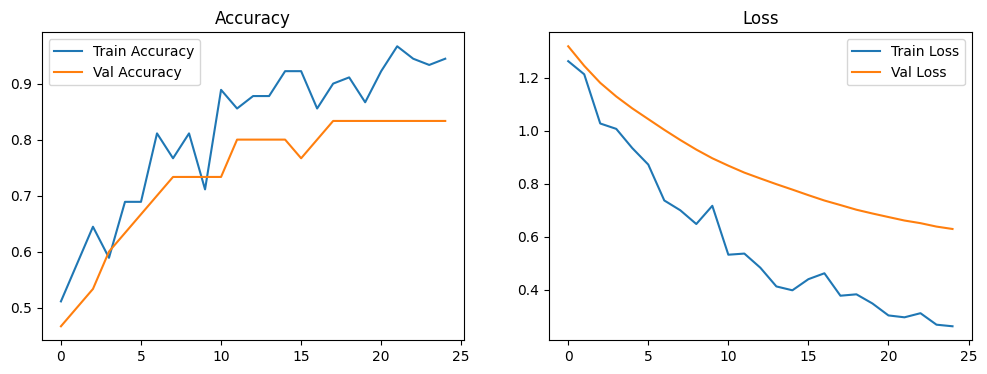

In [46]:
def plot_history(history):
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.legend()
    plt.title('Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.legend()
    plt.title('Loss')

    plt.show()

plot_history(history)


Inference & Classification Report

In [47]:
val_generator.reset()
predictions = model.predict(val_generator, verbose=1)
y_pred = np.argmax(predictions, axis=1)
y_true = val_generator.classes

# Classification report
from sklearn.metrics import classification_report
labels = list(val_generator.class_indices.keys())

print(classification_report(y_true, y_pred, target_names=labels))


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
              precision    recall  f1-score   support

        acai       0.71      1.00      0.83         5
     cupuacu       1.00      0.60      0.75         5
    graviola       1.00      1.00      1.00         5
     guarana       0.83      1.00      0.91         5
     pupunha       0.80      0.80      0.80         5
      tucuma       0.75      0.60      0.67         5

    accuracy                           0.83        30
   macro avg       0.85      0.83      0.83        30
weighted avg       0.85      0.83      0.83        30

